In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/4_2023_113.csv')

In [3]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6418975,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:30,0.0,0.0
1,6418974,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:20,0.0,0.0
2,6418973,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:18,0.0,0.0
3,6418972,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:13,0.0,0.0
4,6418971,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-27 22:15:11,0.0,0.0


In [5]:
data.isnull().sum()

bulk_id                                     0
car_reg_no                                  0
vehicle_speed                               0
heading                                     0
distance                                31671
altitude                                    0
o_s1_b1_voltage                         31671
o_s2_b2_voltage                          1254
o_s1_current                             1264
calculated_engine_load                   1268
engine_rpm                               1277
spark_advance                            1291
absolute_load_value                      1303
throttle_position                        1307
relative_throttle_position               1308
absolute_throttle_position               1313
ap_pos_d                                 1340
ap_pos_e                                 1351
commanded_exhaust_gas_recirculation     31671
commanded_evaporative_purge              1355
commanded_throttle_actuator             31671
fuel_rail_pressure                

In [6]:
data.describe

<bound method NDFrame.describe of        bulk_id  car_reg_no  vehicle_speed  heading  distance  altitude  \
0      6418975         113            0.0      0.0       NaN       0.0   
1      6418974         113            0.0      0.0       NaN       0.0   
2      6418973         113            0.0      0.0       NaN       0.0   
3      6418972         113            0.0      0.0       NaN       0.0   
4      6418971         113            0.0      0.0       NaN       0.0   
...        ...         ...            ...      ...       ...       ...   
31666  6387251         113            8.0      0.0       NaN       0.0   
31667  6387250         113            8.0      0.0       NaN       0.0   
31668  6387249         113           20.0      0.0       NaN       0.0   
31669  6387248         113            0.0      0.0       NaN       0.0   
31670  6387247         113            0.0      0.0       NaN       0.0   

       o_s1_b1_voltage  o_s2_b2_voltage  o_s1_current  calculated_engine_load

In [7]:
data.shape

(31671, 41)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31671 entries, 0 to 31670
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bulk_id                               31671 non-null  int64  
 1   car_reg_no                            31671 non-null  int64  
 2   vehicle_speed                         31671 non-null  float64
 3   heading                               31671 non-null  float64
 4   distance                              0 non-null      float64
 5   altitude                              31671 non-null  float64
 6   o_s1_b1_voltage                       0 non-null      float64
 7   o_s2_b2_voltage                       30417 non-null  float64
 8   o_s1_current                          30407 non-null  float64
 9   calculated_engine_load                30403 non-null  float64
 10  engine_rpm                            30394 non-null  float64
 11  spark_advance  

In [29]:
# Drop columns with more than 50% missing values
threshold = 0.5
missing_percentage = data.isnull().sum() / len(data)
columns_to_drop = missing_percentage[missing_percentage > threshold].index
cleaned_data = data.drop(columns=columns_to_drop)

In [30]:
# Drop irrelevant columns
irrelevant_columns = ['bulk_id', 'car_reg_no', 'time_stamp']
cleaned_data = cleaned_data.drop(columns=[col for col in irrelevant_columns if col in cleaned_data.columns])

In [31]:
# Impute missing values with mean for numerical columns
for col in cleaned_data.select_dtypes(include=['float64', 'int64']).columns:
    if cleaned_data[col].isnull().sum() > 0:
        cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)

C:\Users\shaje\AppData\Local\Temp\ipykernel_14444\1992823191.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)


<Figure size 1600x1200 with 0 Axes>

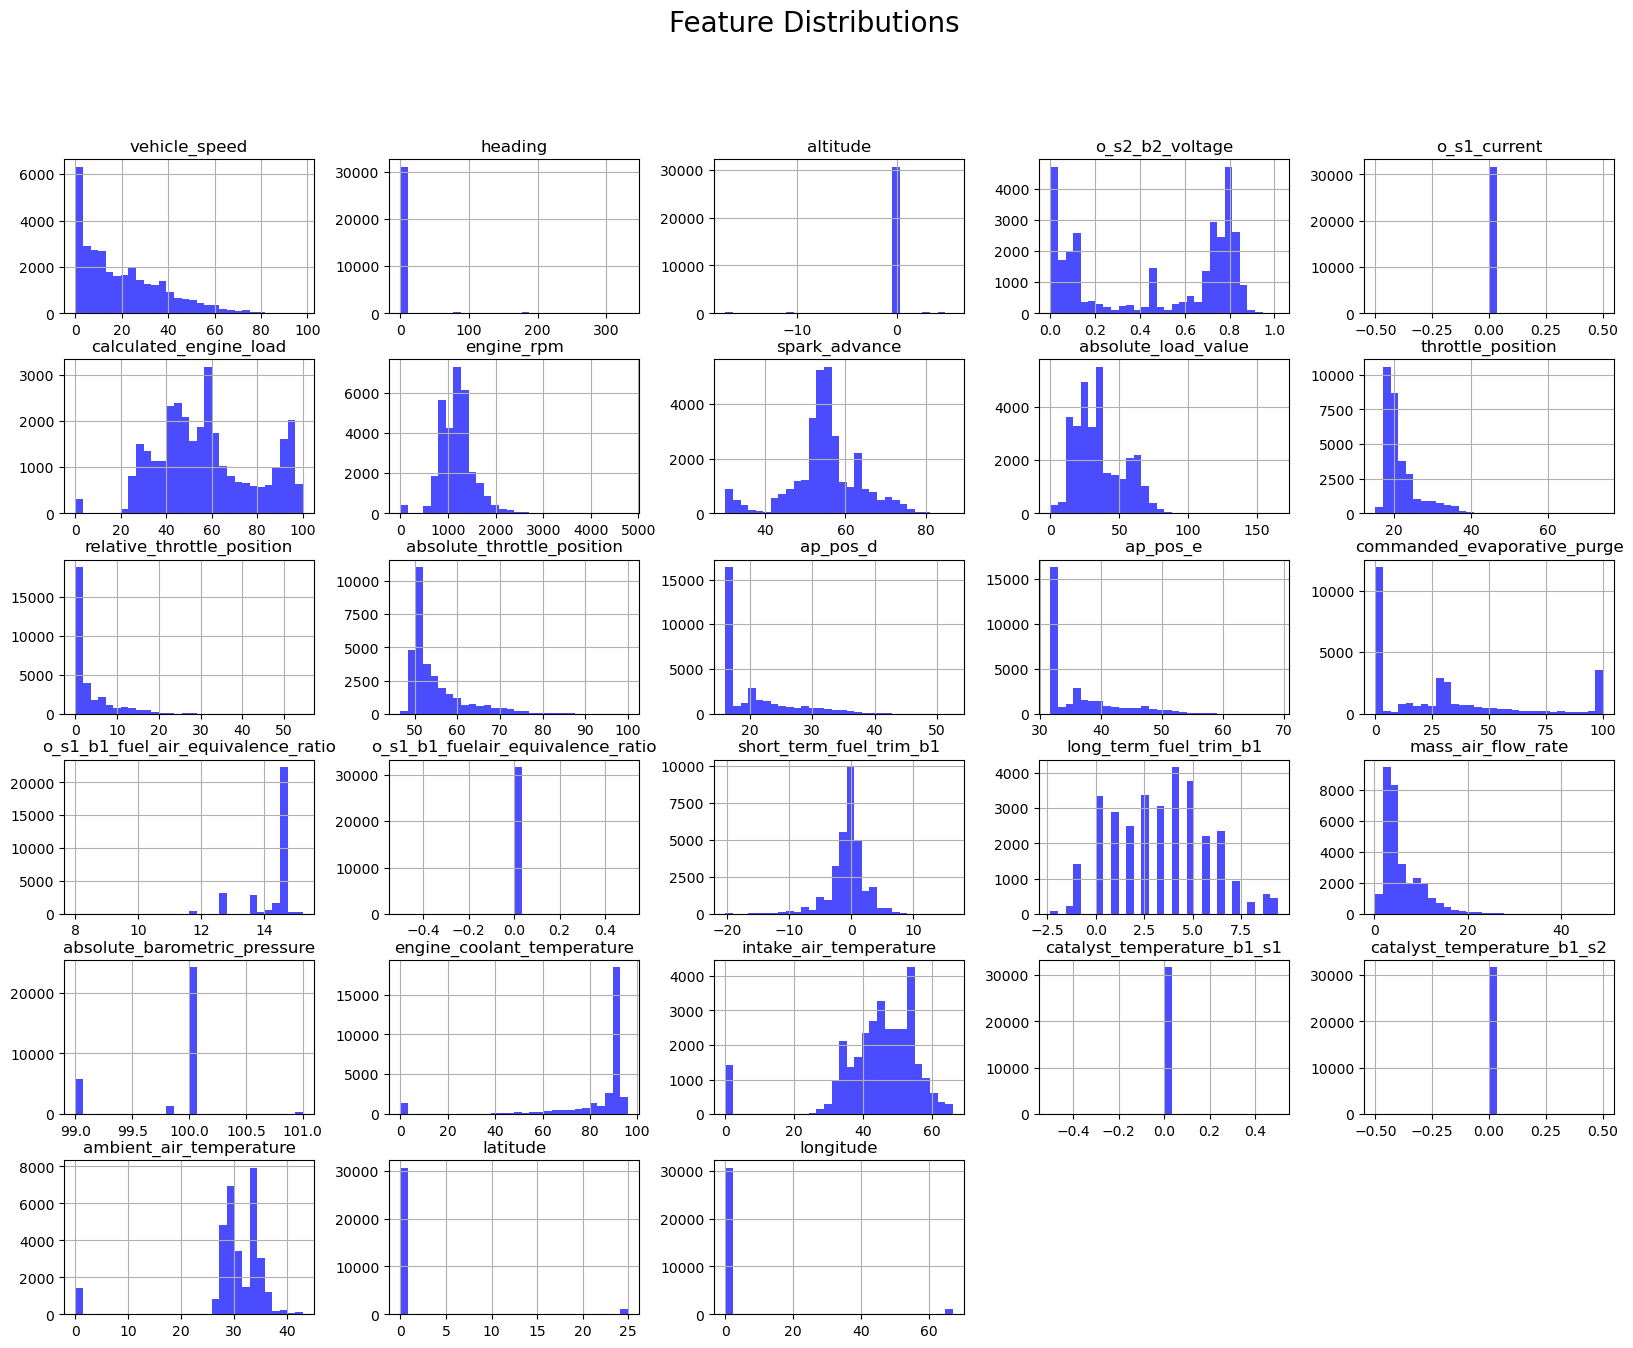

In [32]:
# EDA: Feature Distributions
plt.figure(figsize=(16, 12))
cleaned_data.hist(bins=30, figsize=(20, 15), color='blue', alpha=0.7)
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

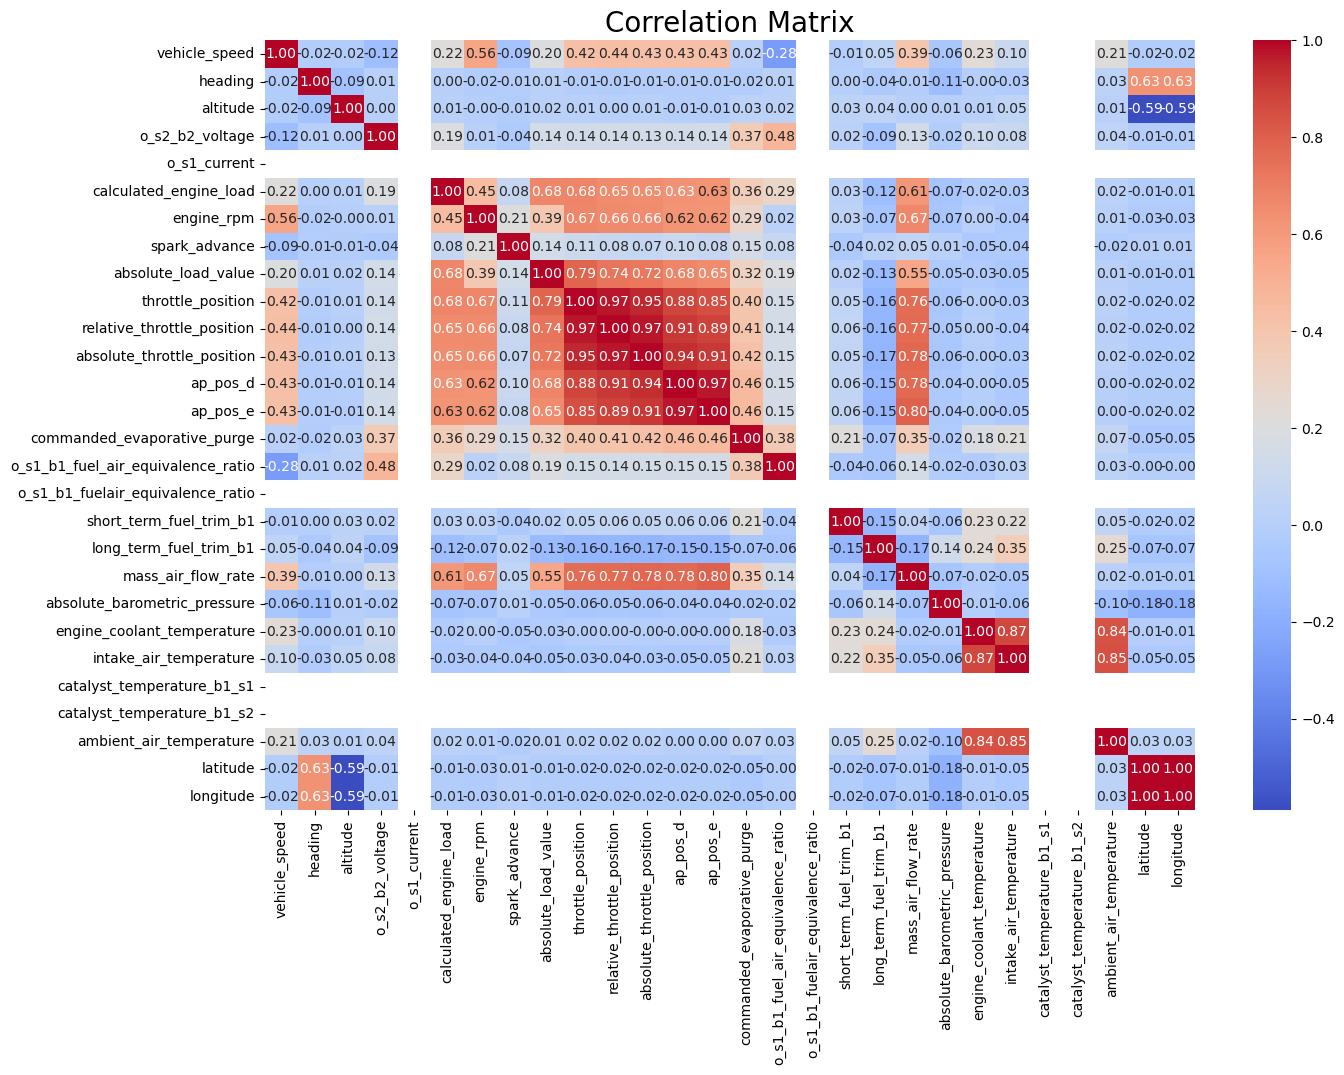

In [33]:
# EDA: Correlation Matrix
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [34]:
# Define target and features
target_variable = 'vehicle_speed'
X = cleaned_data.drop(columns=[target_variable])
y = cleaned_data[target_variable]

In [35]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# Standard Scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [39]:
# Print metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 7.803294221769669
R-squared (R²): 0.8013194962898883


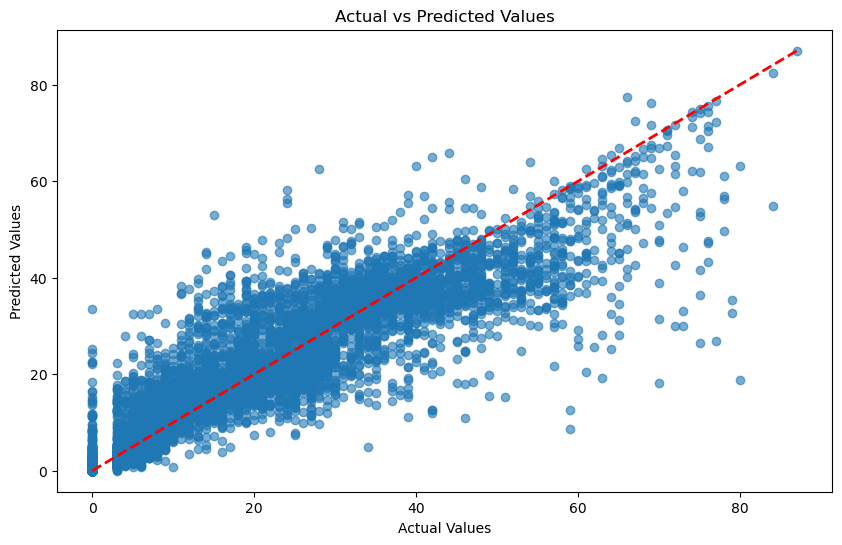

In [42]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

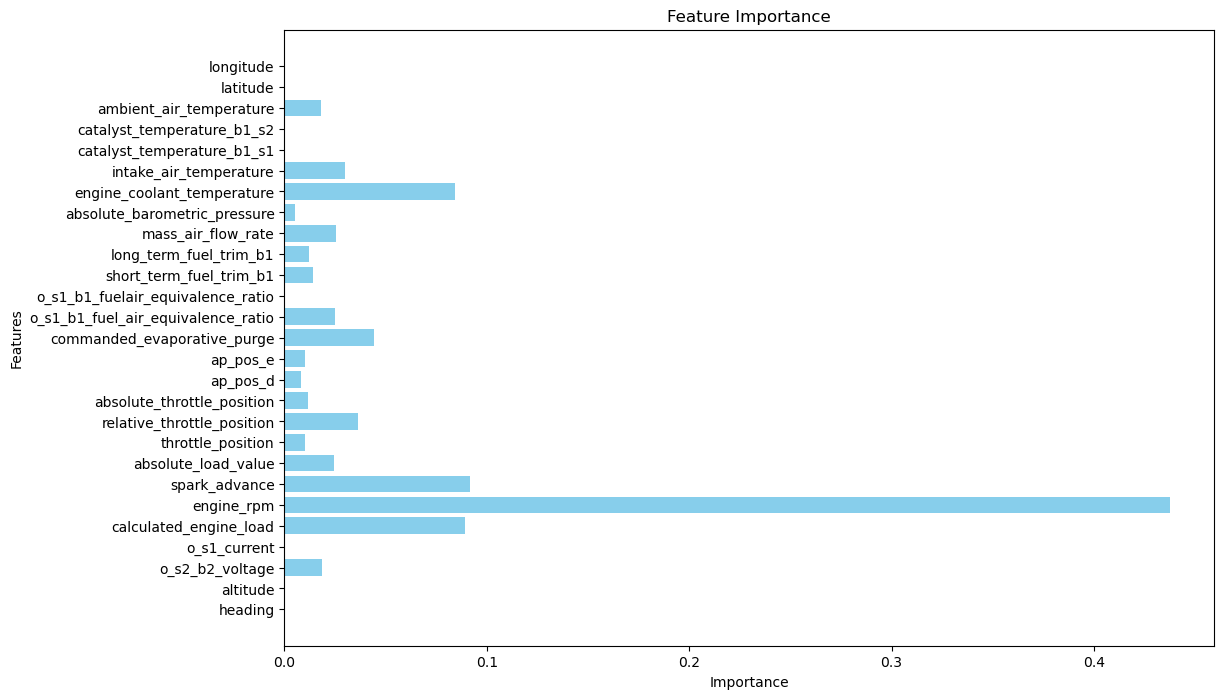

In [41]:
# Plot Feature Importance
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()